# 📌 Week 3 시계열 데이터 과제

- **구성:** 이론 + 실습  
- **이론:** 정규 세션 핵심 내용 기반 주관식 문제(총 2문제)
- **실습:** ARIMA 모델 & DLinear 모델 활용(총 4문제)
<br><br> 모르는 부분 혹은 문제에 오류가 있는 경우 편하게 연락해주세요:)

## 📖 이론
🔹 정규 세션에서 배운 핵심 개념을 바탕으로 한 **주관식 문제**입니다.  

**Q1**


- 시계열 데이터에서 정상성이 중요한 이유를 말씀해주시고, ARIMA 모델에서는 데이터의 비정상성을 어떻게 처리하는지 설명해주세요.


**A1**


정상성을 가지지 않으면, 우리가 통제한 변수 이외에 시간이나 계절과 같은 요인에 의해 데이터가 크게 왜곡될 수 있다. 따라서 모델 성능이 크게 떨어질 수 있기 때문에, 차분을 꼭 진행해주어야 한다.
ARIMA에서는 비정상성을 차분을 통해 처리한다.

**Q2**

- AR(p) 및 MA(q) 모델을 차이점을 중심으로 설명해주세요. 또한, 파라미터 p와 q 결정하는 방법에 대해 상세하게 설명해주세요.

**A2**

AR은 자기 상관성을 시계열로 나타낸 모델로, 과거 데이터의 선형 결합을 통해 현재 값을 예측하는 모델이다.

MA는 과거의 오차들의 선형 결합을 통해 현재 값을 예측하는 모델이다.

AR의 파라미터 P는 모델의 차수를 의미하고 MA의 파라미터 q는 과거 몇번째 시점까지의 오차를 포함할 것인지를 의미한다.



---



## 💻 실습1 ARIMA  
🔹 모의 데이터를 활용한 **ARIMA** 모델 실습입니다. 주어진 데이터를 활용하여 코드 중간중간 주어진 문제에 답해주세요.


### 데이터 전처리

In [33]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# 데이터 로드
df = pd.read_csv("/content/Time_Series_hw_data_train.csv")
df_eval=pd.read_csv("/content/Time_Series_hw_data_test.csv")

# 데이터 확인
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [2]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [34]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

# 필요한 컬럼 선택 (meantemp)
df = df[["meantemp"]]

df_eval["date"] = pd.to_datetime(df_eval["date"])
df_eval.set_index("date", inplace=True)

# 필요한 컬럼 선택 (meantemp)
df_eval = df_eval[["meantemp"]]

df.head(20)

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
2013-01-06,7.000000
2013-01-07,7.000000
2013-01-08,8.857143
2013-01-09,14.000000


### 정상성 확인

In [4]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# ADF 테스트 (단위근 검정) 수행
adf_result = adfuller(df["meantemp"])
adf_statistic, p_value = adf_result[0], adf_result[1]


# ADF 검정 결과 출력
adf_statistic, p_value

(-2.0210690559206737, 0.2774121372301601)

**Q1**

- 위 결과로부터 데이터가 정상성을 가지는지 답하고, 비정상성을 가진다면 어떤 처리를 할 수 있는지 서술해주세요,<br><br>




**A1**<br><br>
답: p-value가 0.05보다 크므로, 귀무가설을 기각할 수 없다. 따라서 해당 데이터는 비정상성을 갖는다.
데이터가 비정상성을 갖는다면 차분을 진행해주어야 한다. 1차 차분 후 adf 검정을 다시 진행해보고, 비정상성이 남아있다면 2차 차분 및 로그변환 등을 진행한다.

In [5]:
# 차분 진행
df_diff = df.diff().dropna()

# ADF 테스트 (차분 후)
adf_result_diff = adfuller(df_diff["meantemp"])
adf_statistic_diff, p_value_diff = adf_result_diff[0], adf_result_diff[1]

adf_statistic_diff, p_value_diff

(-16.378720267074673, 2.764863137594644e-29)

### ARIMA 하이퍼 파라미터 결정

**Q2**

- 아래 ACF와 PACF Plot으로부터 ARIMA의 하이퍼파라미터인 p와 q를 얼마로 설정해야할지 그 숫자와 근거를 적어주세요. 이후 변수를 선언해주세요.<br><br>

**A2**<br>

p: 5
<br>
이유: pacf에서 뚝! 떨어지는 값 전까지 포함
<br><br>

q: 3
<br>
이유:acf에서 뚝! 떨어지는 값 전까지 포함

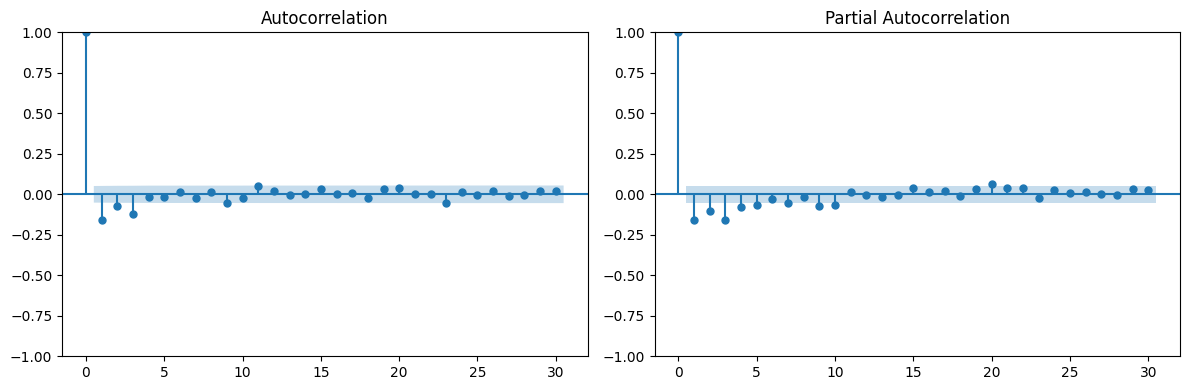

In [6]:
# ACF와 PACF 플롯
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(df_diff["meantemp"], lags=30, ax=axes[0])
sm.graphics.tsa.plot_pacf(df_diff["meantemp"], lags=30, ax=axes[1])

plt.tight_layout()
plt.show()


In [7]:
# 변수 선언
p=5
q=3

### ARIMA 학습

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

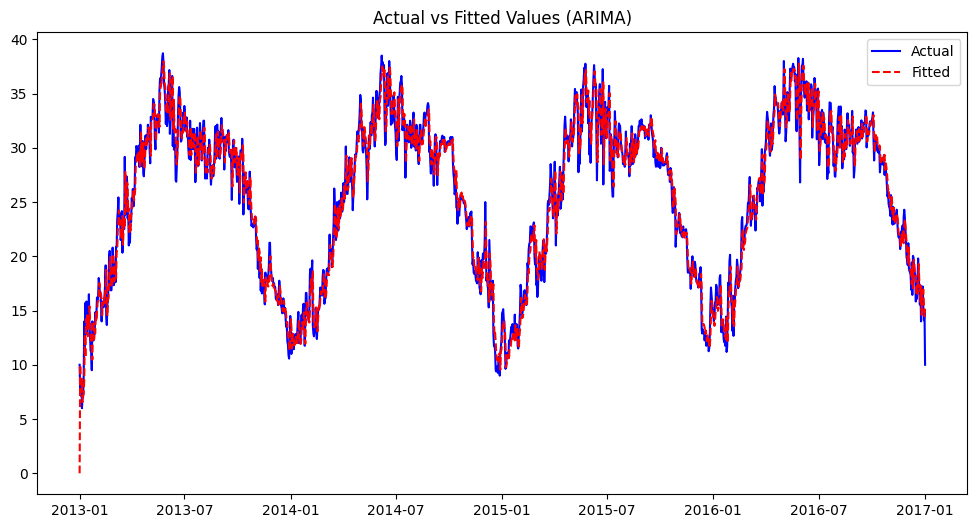

In [8]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df["meantemp"], order=(p, 1, q))
model_fit = model.fit()

# 예측 수행
df["fitted"] = model_fit.fittedvalues

# 실제값과 예측값 시각화
plt.figure(figsize=(12, 6))
plt.plot(df["meantemp"], label="Actual", color="blue")
plt.plot(df["fitted"], label="Fitted", color="red", linestyle="dashed")
plt.title("Actual vs Fitted Values (ARIMA)")
plt.legend()
plt.show()

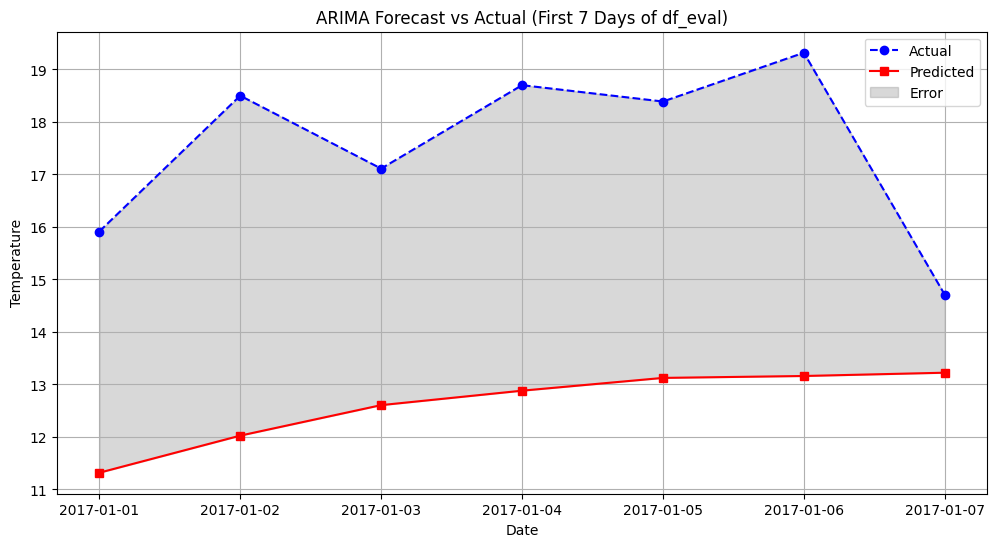

In [9]:
test_series = df_eval['meantemp'][:7]

forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(test_series.index, test_series, label="Actual", linestyle="dashed", marker="o", color="blue")
plt.plot(test_series.index, forecast, label="Predicted", marker="s", color="red")
plt.fill_between(test_series.index, test_series, forecast, color="gray", alpha=0.3, label="Error")
plt.title("ARIMA Forecast vs Actual (First 7 Days of df_eval)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()

### AutoARIMA

아래는 자동으로 p,d,q 값을 계산해주는 auto_arima를 사용한 코드입니다.

In [10]:
#!pip install "numpy>=1.21,<2.0" "pmdarima"
# !pip install pmdarima

In [11]:
# !pip install pmdarima

In [12]:
from pmdarima import auto_arima

stepwise_model = auto_arima(df["meantemp"],
                            start_p=0, max_p=5,
                            start_q=0, max_q=5,
                            seasonal=False,
                            trace=True,  # 최적화 과정 출력
                            error_action="ignore",
                            suppress_warnings=True)

# 최적의 (p, d, q) 값 출력
print(f"\n Optimal (p, d, q): {stepwise_model.order}\n")

# 최적의 파라미터로 ARIMA 모델 학습
p, d, q = stepwise_model.order
model = ARIMA(df["meantemp"], order=(p, d, q))
model_fit = model.fit()

# 예측값 저장
df["fitted"] = model_fit.fittedvalues


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5650.181, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5614.068, Time=0.20 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5602.114, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5648.181, Time=0.10 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5544.460, Time=2.43 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5546.100, Time=1.05 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5546.168, Time=0.41 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5573.723, Time=0.34 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5600.849, Time=0.26 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5546.314, Time=1.74 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5542.478, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5600.115, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5612.068, Time=0.07 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5544.118, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5544.186, Time=0.20 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5571.729, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=5598.850, Time=0.09 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5544.332, Time=0.57 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 8.732 seconds

 Optimal (p, d, q): (1, 1, 1)



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


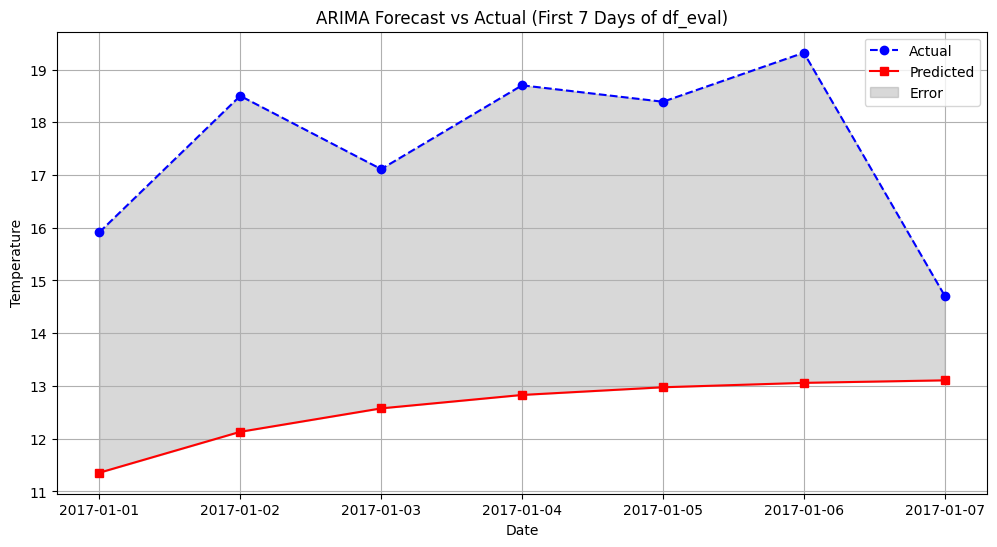

In [13]:
test_series = df_eval['meantemp'][:7]

forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(test_series.index, test_series, label="Actual", linestyle="dashed", marker="o", color="blue")
plt.plot(test_series.index, forecast, label="Predicted", marker="s", color="red")
plt.fill_between(test_series.index, test_series, forecast, color="gray", alpha=0.3, label="Error")
plt.title("ARIMA Forecast vs Actual (First 7 Days of df_eval)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()



---



## 💻 실습2 Dlinear

In [14]:
import pandas as pd
import numpy as np
# 데이터 로드
train_df = pd.read_csv('/content/Time_Series_hw_data_train.csv')
test_df = pd.read_csv('/content/Time_Series_hw_data_test.csv')

# 날짜 컬럼을 제외한 데이터만 사용
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
train_df.set_index('date', inplace=True)
test_df.set_index('date', inplace=True)

features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
train_values = train_df[features].values.astype(np.float32)
test_values = test_df[features].values.astype(np.float32)

**Q3**

- 30일간의 날씨 데이터를 이용해 7일 동안의 온도, 습도, 풍속, 대기압을 예측하고자 합니다. 아래 코드의 빈칸을 채워주세요. <br><br>


In [15]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader

# Sliding Window 전처리
def create_sequences(data, seq_len, pred_len):
    X, y = [], []
    for i in range(len(data) - seq_len - pred_len):
        X.append(data[i:i+seq_len]) # 빈칸을 채워주세요
        y.append(data[i+seq_len:i+seq_len+pred_len])  # 빈칸을 채워주세요
    return np.array(X), np.array(y)


seq_len = 30 # 빈칸을 채워주세요(예측을 위해 사용할 time step 수)
pred_len = 7 # 빈칸을 채워주세요(실제 예측할 time step 수)
X_train, y_train = create_sequences(train_values, seq_len, pred_len)


# PyTorch Dataset 정의
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

train_dataset = TimeSeriesDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

/tmp/ipython-input-2452587905.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.X = torch.tensor(X, dtype=torch.float32)
/tmp/ipython-input-2452587905.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y, dtype=torch.float32)


In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# Dlinear 모델 선언

# 이동 평균을 이용한 추세 추출
class moving_avg(nn.Module):

    def __init__(self, kernel_size, stride):
        super(moving_avg, self).__init__()
        self.kernel_size = kernel_size # Kernel: 이동 평균을 계산하기 위한 시간대의 길이
        self.avg = nn.AvgPool1d(kernel_size=kernel_size, stride=stride, padding=0)

    def forward(self, x):
        # padding on the both ends of time series
        front = x[:, 0:1, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        end = x[:, -1:, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        x = torch.cat([front, x, end], dim=1)
        x = self.avg(x.permute(0, 2, 1))
        x = x.permute(0, 2, 1)
        return x

# 시계열 분해
class series_decomp(nn.Module):
    """
    Series decomposition block
    """
    def __init__(self, kernel_size):
        super(series_decomp, self).__init__()
        self.moving_avg = moving_avg(kernel_size, stride=1)

    def forward(self, x):
        moving_mean = self.moving_avg(x)
        res = x - moving_mean # 데이터에서 추세를 빼면 계절성 부분만 남음
        return res, moving_mean

# 모델
class Model(nn.Module):
    def __init__(self, configs):
        super(Model, self).__init__()
        self.seq_len = configs['seq_len']
        self.pred_len = configs['pred_len']
        self.individual = configs['individual'] # 특성마다 다른 선형 회귀를 적용할지 여부
        self.channels = configs['enc_in'] # 입력 및 출력되는 특성 수

        # Decomposition Kernel Size
        kernel_size = configs['kernel_size'] # Kernel: 이동 평균을 계산하기 위한 시간대의 길이
        self.decompsition = series_decomp(kernel_size)

        if self.individual:
            self.Linear_Seasonal = nn.ModuleList()
            self.Linear_Trend = nn.ModuleList()

            for i in range(self.channels):
                self.Linear_Seasonal.append(nn.Linear(self.seq_len, self.pred_len))
                self.Linear_Trend.append(nn.Linear(self.seq_len, self.pred_len))
        else:
            self.Linear_Seasonal = nn.Linear(self.seq_len, self.pred_len)
            self.Linear_Trend = nn.Linear(self.seq_len, self.pred_len)

    def forward(self, x):
        seasonal_init, trend_init = self.decompsition(x)
        seasonal_init, trend_init = seasonal_init.permute(0, 2, 1), trend_init.permute(0, 2, 1)

        if self.individual:
            seasonal_output = torch.zeros([seasonal_init.size(0), seasonal_init.size(1), self.pred_len], dtype=seasonal_init.dtype).to(seasonal_init.device)
            trend_output = torch.zeros([trend_init.size(0), trend_init.size(1), self.pred_len], dtype=trend_init.dtype).to(trend_init.device)

            for i in range(self.channels):
                seasonal_output[:, i, :] = self.Linear_Seasonal[i](seasonal_init[:, i, :])
                trend_output[:, i, :] = self.Linear_Trend[i](trend_init[:, i, :])
        else:
            seasonal_output = self.Linear_Seasonal(seasonal_init)
            trend_output = self.Linear_Trend(trend_init)

        x = seasonal_output + trend_output
        return x.permute(0, 2, 1)

**Q4**

- Dlinear 모델은 kernel, learning rate, individual, epoch 등 여러 하이퍼 파라미터가 존재합니다. 위의 하이퍼 파라미터를 직접 조정하시면서 평균 에러가 가장 낮게 나온 값을 작성해주세요. 마지막으로 ARIMA와 비교하여 어느 모델의 정확도가 더 높은 것 같은지 적어주세요.<br><br>

Dlinear 모델이 정확도가 더 높음.

**A4**<br><br>
Kernel: 21
<br>
learning rate: 0.001
<br>
individual:  False
<br>
epoch: 50
<br><br>
정확도가 더 높은 모델: Dlinear


In [60]:
# Kernel과 individual의 경우 configs 값을 조정해주세요

configs = {
    'seq_len': seq_len,
    'pred_len': pred_len,
    'individual': False,
    'enc_in': len(features),  # 모든 특성 사용
    'kernel_size': 21
}
model = Model(configs)
optimizer = optim.Adam(model.parameters(), lr=0.001) # learning rate 조절
loss_fn = nn.MSELoss()

# 모델 학습
num_epochs = 50 # epoch 조절
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = loss_fn(output, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")


Epoch 1/50, Loss: 159836.3802
Epoch 2/50, Loss: 11979.0030
Epoch 3/50, Loss: 11107.9117
Epoch 4/50, Loss: 10746.4008
Epoch 5/50, Loss: 10458.7035
Epoch 6/50, Loss: 10167.6123
Epoch 7/50, Loss: 9961.6240
Epoch 8/50, Loss: 9744.2086
Epoch 9/50, Loss: 9553.3607
Epoch 10/50, Loss: 9421.3756
Epoch 11/50, Loss: 9292.3419
Epoch 12/50, Loss: 9211.8659
Epoch 13/50, Loss: 9117.3507
Epoch 14/50, Loss: 9026.5278
Epoch 15/50, Loss: 8971.7156
Epoch 16/50, Loss: 8914.7532
Epoch 17/50, Loss: 8870.0594
Epoch 18/50, Loss: 8839.2310
Epoch 19/50, Loss: 8824.9279
Epoch 20/50, Loss: 8789.6768
Epoch 21/50, Loss: 8773.1452
Epoch 22/50, Loss: 8759.6639
Epoch 23/50, Loss: 8740.1477
Epoch 24/50, Loss: 8745.9603
Epoch 25/50, Loss: 8755.3228
Epoch 26/50, Loss: 8721.4181
Epoch 27/50, Loss: 8724.3584
Epoch 28/50, Loss: 8731.2614
Epoch 29/50, Loss: 9050.0451
Epoch 30/50, Loss: 8830.4435
Epoch 31/50, Loss: 8719.8554
Epoch 32/50, Loss: 8911.4032
Epoch 33/50, Loss: 8818.2711
Epoch 34/50, Loss: 8741.1104
Epoch 35/50, Los

평균 에러: 0.2680116295814514


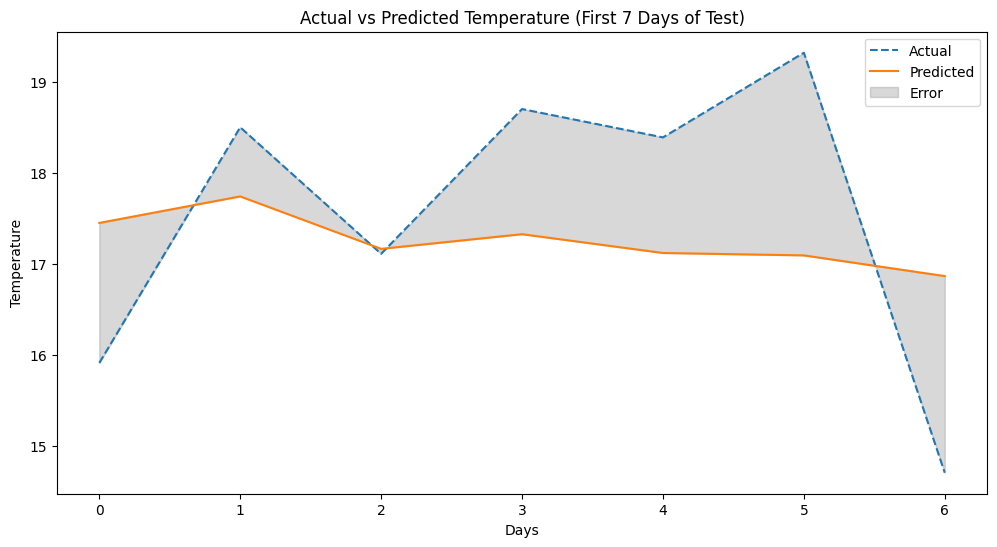

In [61]:
model.eval()
last_30_days = torch.tensor(train_values[-30:], dtype=torch.float32).unsqueeze(0)
with torch.no_grad():
    predictions = model(last_30_days).squeeze().numpy()

# 실제값 (온도만)
actuals = test_values[:7, 0]

# 예측값에서 온도만 선택
predictions_temp = predictions[:, 0]

# 차이 계산
error = actuals - predictions_temp

print(f"평균 에러: {error.mean()}")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(range(7), actuals, label='Actual', linestyle='dashed')
plt.plot(range(7), predictions_temp, label='Predicted')
plt.fill_between(range(7), actuals, predictions_temp, color='gray', alpha=0.3, label='Error')
plt.title('Actual vs Predicted Temperature (First 7 Days of Test)')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [64]:
df

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


# LSTM

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# -----------------------------
# 1. 데이터 준비 (예시)
# -----------------------------
# temp: shape (days, 1), 2013~2016 기온 데이터
# y: 2017 예측용 label


scaler = StandardScaler()
temp_scaled = scaler.fit_transform(df[['meantemp']])

# 시퀀스 생성
seq_len = 60
pred_len = 7
X, y = [], []
for i in range(len(temp_scaled) - seq_len - pred_len +1):
    X.append(temp_scaled[i:i+seq_len])
    y.append(temp_scaled[i+seq_len:i+seq_len+pred_len])
X = np.array(X)  # (samples, seq_len, 1)
y = np.array(y)  # (samples, pred_len, 1)

dataset = TensorDataset(torch.tensor(X, dtype=torch.float32),
                        torch.tensor(y, dtype=torch.float32))
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# -----------------------------
# 2. LSTM 모델 정의
# -----------------------------
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, pred_len=7):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, pred_len)

    def forward(self, x):
        out, _ = self.lstm(x)          # out: (batch, seq_len, hidden_size)
        out = out[:, -1, :]            # 마지막 시점 hidden
        out = self.fc(out)             # (batch, pred_len)
        return out

model = LSTMModel(input_size=1, hidden_size=64, num_layers=2, pred_len=pred_len)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.L1Loss()  # MAE, Huber Loss는 nn.SmoothL1Loss()

# -----------------------------
# 3. 학습
# -----------------------------
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = loss_fn(output, batch_y.squeeze(-1))  # pred_len 차원 맞춤
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")

# -----------------------------
# 4. 예측
# -----------------------------
model.eval()
with torch.no_grad():
    last_seq = torch.tensor(temp_scaled[-seq_len:], dtype=torch.float32).unsqueeze(0)  # (1, seq_len, 1)
    pred_scaled = model(last_seq).numpy().flatten()
    pred = scaler.inverse_transform(pred_scaled.reshape(-1,1))
print("2017년 1주일 예측 기온:", pred.flatten())


Epoch 1/50, Loss: 0.5843
Epoch 2/50, Loss: 0.2878
Epoch 3/50, Loss: 0.2666
Epoch 4/50, Loss: 0.2621
Epoch 5/50, Loss: 0.2590
Epoch 6/50, Loss: 0.2588
Epoch 7/50, Loss: 0.2549
Epoch 8/50, Loss: 0.2564
Epoch 9/50, Loss: 0.2549
Epoch 10/50, Loss: 0.2534
Epoch 11/50, Loss: 0.2502
Epoch 12/50, Loss: 0.2519
Epoch 13/50, Loss: 0.2482
Epoch 14/50, Loss: 0.2458
Epoch 15/50, Loss: 0.2447
Epoch 16/50, Loss: 0.2382
Epoch 17/50, Loss: 0.2488
Epoch 18/50, Loss: 0.2395
Epoch 19/50, Loss: 0.2338
Epoch 20/50, Loss: 0.2373
Epoch 21/50, Loss: 0.2345
Epoch 22/50, Loss: 0.2314
Epoch 23/50, Loss: 0.2308
Epoch 24/50, Loss: 0.2336
Epoch 25/50, Loss: 0.2275
Epoch 26/50, Loss: 0.2279
Epoch 27/50, Loss: 0.2301
Epoch 28/50, Loss: 0.2266
Epoch 29/50, Loss: 0.2247
Epoch 30/50, Loss: 0.2217
Epoch 31/50, Loss: 0.2247
Epoch 32/50, Loss: 0.2205
Epoch 33/50, Loss: 0.2190
Epoch 34/50, Loss: 0.2224
Epoch 35/50, Loss: 0.2188
Epoch 36/50, Loss: 0.2160
Epoch 37/50, Loss: 0.2138
Epoch 38/50, Loss: 0.2185
Epoch 39/50, Loss: 0.